# Spam Detection

This is a project to implement a spam detection model using deep learning. The model will be trained on a dataset of spam and non-spam emails. 

Author:
- Victor Amarante

#### Load Libraries

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

#### Load Dataset

In [110]:
spam = pd.read_csv('/Users/victor/Desktop/github/spam-detection-deep-learning/data/spam.csv')

spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### AED

In [111]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [112]:
print('Value Counts - Category Column')
print('Ham:', round(spam['Category'].value_counts(normalize=True)['ham']*100, 2), '%')
print('Spam:', round(spam['Category'].value_counts(normalize=True)['spam']*100, 2), '%')

Value Counts - Category Column
Ham: 86.59 %
Spam: 13.41 %


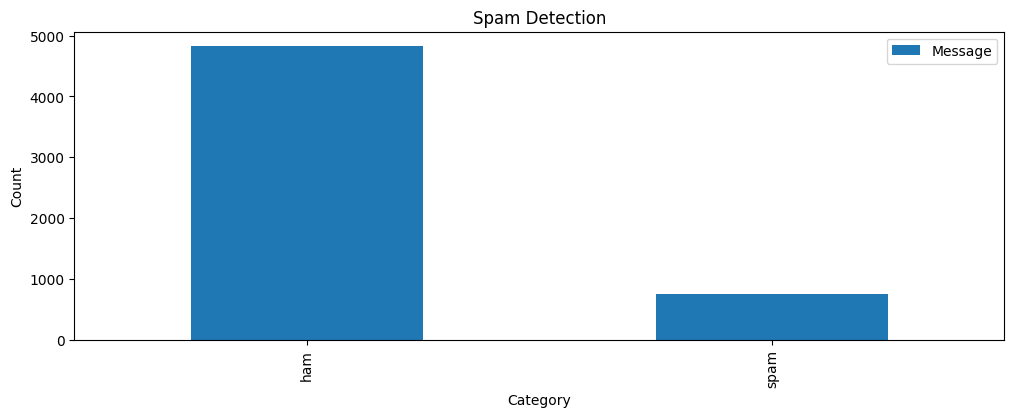

In [113]:
spam.groupby('Category').count().plot(kind='bar', figsize=(12,4))
plt.title('Spam Detection')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

### Preprocessing data

In [114]:
labelenconder = LabelEncoder()
y = labelenconder.fit_transform(spam['Category'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [115]:
spam['Message'].values

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [116]:
messages = spam['Message'].values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(messages, y, test_size=0.3)

In [118]:
token = Tokenizer(num_words=1000)
token.fit_on_texts(X_train)
token.fit_on_texts(X_test)
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

In [121]:
X_train = pad_sequences(X_train, maxlen=500, padding='post')
X_test = pad_sequences(X_test, maxlen=500, padding='post')

In [123]:
len(token.word_index)

9004

#### Create model

In [127]:
model = Sequential()
model.add(Embedding(input_dim=len(token.word_index), output_dim=50, input_length=500))
model.add(Flatten())
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [128]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [129]:
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=True, validation_data=(X_test, y_test))

Epoch 1/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8552 - loss: 0.1342 - val_accuracy: 0.8600 - val_loss: 0.1400
Epoch 2/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.1259 - val_accuracy: 0.9815 - val_loss: 0.0419
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9699 - loss: 0.0435 - val_accuracy: 0.9797 - val_loss: 0.0339
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.0310 - val_accuracy: 0.9862 - val_loss: 0.0256
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0229 - val_accuracy: 0.9904 - val_loss: 0.0200
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9814 - loss: 0.0228 - val_accuracy: 0.9868 - val_loss: 0.0192
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9821 - loss: 0.0197 - val_accuracy: 0.9880 - val_loss: 0.0103
Epoch 8/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9807 - loss: 0.0157 - val_accuracy: 0.

In [130]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9879 - loss: 0.0117
Loss: 0.012482008896768093
Accuracy: 0.9862440228462219


In [131]:
new_prediction = model.predict(X_test)
print(new_prediction)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[5.8798040e-13]
 [2.1228943e-09]
 [5.6371334e-07]
 ...
 [3.1096046e-21]
 [1.6593778e-03]
 [1.0000000e+00]]


In [135]:
prediction = (new_prediction > 0.5).astype(int)
print(f'Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, prediction)}')

Accuracy: 0.986244019138756
Confusion matrix:
[[1424   14]
 [   9  225]]
